In [1]:
# Packages
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

import matplotlib as mpl
# label_size = 24
# mpl.rcParams['xtick.labelsize'] = label_size 
# plt.rcParams['xtick.labelsize']=24
# plt.rcParams['ytick.labelsize']=24

import matplotlib.pyplot as plt

SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import wrangle
import linear_random

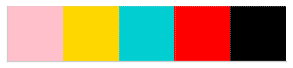

In [2]:
# Create an array with the colors you want to use
heat = [ 'pink', 'gold', 'darkturquoise', 'red', 'black']
# Set your custom color palette
my_pal = sns.color_palette(heat)
sns.palplot(my_pal)

In [3]:
# acquire data
df = pd.read_csv("train_maybe_final.csv")

In [4]:
df.type.value_counts()

Game          2652615
Activity      2059975
Assessment     534494
Clip            63522
Name: type, dtype: int64

In [5]:
df.shape

(5310606, 19)

In [6]:
df.installation_id.nunique()

3485

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310606 entries, 0 to 5310605
Data columns (total 19 columns):
Unnamed: 0         int64
event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
num_correct        float64
num_incorrect      float64
accuracy           float64
accuracy_group     float64
date               object
hour               int64
weekday            object
dtypes: float64(4), int64(5), object(10)
memory usage: 769.8+ MB


In [8]:
df.head(5)

,Unnamed: 0,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
0,0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1,1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can ...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":1015,""stage_height"":762},""event_count"":3...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


# Re-count frequency for each engagement types

In [9]:
df = df[df.world != 'NONE']

In [10]:
df.world.unique()

array(['MAGMAPEAK', 'TREETOPCITY', 'CRYSTALCAVES'], dtype=object)

In [11]:
clip2 = df.groupby(['installation_id','game_session','world','type','title'])[['event_id']].count()
clip2

event_id
installation_id game_session     world        type     title                                  
0006a69f        0336db4dee65ad4b MAGMAPEAK    Game     Scrub-A-Dub                         131
                05921a6eb858eeba TREETOPCITY  Activity Fireworks (Activity)                 84
                09fd0cc02e6ee5f4 TREETOPCITY  Clip     Pirate's Tale                         1
                1623f262016185e4 MAGMAPEAK    Game     Scrub-A-Dub                          64
                1dd51df3dd28e7e0 TREETOPCITY  Clip     Costume Box                           1
...                                                                                        ...
ffeb0b1b        e96910064986ea78 MAGMAPEAK    Activity Sandcastle Builder (Activity)        76
                ead68f52fcce38ff TREETOPCITY  Clip     Tree Top City - Level 1               1
                ee35ad382b29b3e0 TREETOPCITY  Clip     Ordering Spheres                      1
                f88dc29664b912a3 CRYSTALCAVES Game     Chow Time                           604
                fafc3deda44d80dc TREETOPCITY  Clip     Ordering Spheres                      1

[114732 rows x 1 columns]

In [12]:
clip2 = clip2.drop(columns = 'event_id').reset_index()
clip2

,installation_id,game_session,world,type,title
0,0006a69f,0336db4dee65ad4b,MAGMAPEAK,Game,Scrub-A-Dub
1,0006a69f,05921a6eb858eeba,TREETOPCITY,Activity,Fireworks (Activity)
2,0006a69f,09fd0cc02e6ee5f4,TREETOPCITY,Clip,Pirate's Tale
3,0006a69f,1623f262016185e4,MAGMAPEAK,Game,Scrub-A-Dub
4,0006a69f,1dd51df3dd28e7e0,TREETOPCITY,Clip,Costume Box
...,...,...,...,...,...
114727,ffeb0b1b,e96910064986ea78,MAGMAPEAK,Activity,Sandcastle Builder (Activity)
114728,ffeb0b1b,ead68f52fcce38ff,TREETOPCITY,Clip,Tree Top City - Level 1
114729,ffeb0b1b,ee35ad382b29b3e0,TREETOPCITY,Clip,Ordering Spheres
114730,ffeb0b1b,f88dc29664b912a3,CRYSTALCAVES,Game,Chow Time


In [13]:
clip2 = clip2.groupby(['installation_id','type'])[['title']].count()
clip2

title
installation_id type             
0006a69f        Activity       10
                Assessment      4
                Clip           25
                Game           13
0006c192        Activity        8
...                           ...
ffd2871d        Game            3
ffeb0b1b        Activity        4
                Assessment      2
                Clip           21
                Game            6

[12051 rows x 1 columns]

In [14]:
clip_pivot2 = (clip2
       .pivot_table(
           values = 'title', 
           index = ['installation_id'], 
           columns = ['type'], 
           aggfunc=np.sum
       ).fillna(0).reset_index())


In [15]:
clip_pivot2

type,installation_id,Activity,Assessment,Clip,Game
0,0006a69f,10.0,4.0,25.0,13.0
1,0006c192,8.0,2.0,26.0,6.0
2,001d0ed0,1.0,4.0,18.0,3.0
3,00225f67,3.0,0.0,9.0,3.0
4,00279ac5,10.0,0.0,17.0,11.0
...,...,...,...,...,...
3480,ff9305d7,7.0,3.0,11.0,5.0
3481,ff9715db,11.0,8.0,16.0,6.0
3482,ffc90c32,7.0,5.0,25.0,11.0
3483,ffd2871d,2.0,0.0,2.0,3.0


In [16]:
clip2.groupby('type').title.count()

type
Activity      3074
Assessment    2496
Clip          3428
Game          3053
Name: title, dtype: int64

# What are the usage distributions (ratio) for each item in the game?

In [17]:
#import plotly.plotly as py
import plotly.graph_objs as go

In [18]:
c = (clip2.groupby("type")["title"].count())
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()

In [128]:
x = pcts.type
y = pcts.title

fig = go.Figure(data = [go.Bar(
            x=x,
            y=y,
            #text=round(y,2),
            #textposition = 'auto', 
            marker=dict(
                color= '#2199D4',
                line=dict(
                    color='black',
                    width=2),
            ),
            opacity=0.6
        )]) # hover text goes here
fig.update_layout(dict(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)'))
#fig.update_traces(marker=dict(size=16,line=dict(width=1.85,color='black')),selector=dict(mode='markers'))

#fig.update_layout(title='Population of USA States')
fig.show()

In [ ]:
# plt.figure(figsize=(16,12))

# c = (clip2.groupby("type")["title"].count())
# pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
# #plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
# (sns.barplot(x = "type" , y="title", data=pcts, palette=my_pal))

# plt.title("What are the usage distributions (ratio) for each item in the game?")
# plt.savefig('engagement_type_freq.pdf')

# # overall, games and activities are much more used than assessments

# correlation: clips watched versus accuracy in assessment

In [24]:
# calculate the median accuracy for each student
median = df.groupby(["installation_id"]).accuracy.median().reset_index()
median

,installation_id,accuracy
0,0006a69f,0.500000
1,0006c192,0.000000
2,001d0ed0,0.500000
3,00225f67,NaN
4,00279ac5,NaN
...,...,...
3480,ff9305d7,0.076923
3481,ff9715db,1.000000
3482,ffc90c32,1.000000
3483,ffd2871d,NaN


In [25]:
# compare the relationship between accuracy and number of access to each engagement type
clip_pivot2 = (clip_pivot2
             .merge(median, how = "left", left_on = "installation_id", right_on = "installation_id")
             .set_index(["installation_id"]))

In [26]:
clip_pivot2

,Activity,Assessment,Clip,Game,accuracy
installation_id,,,,,
0006a69f,10.0,4.0,25.0,13.0,0.500000
0006c192,8.0,2.0,26.0,6.0,0.000000
001d0ed0,1.0,4.0,18.0,3.0,0.500000
00225f67,3.0,0.0,9.0,3.0,NaN
00279ac5,10.0,0.0,17.0,11.0,NaN
...,...,...,...,...,...
ff9305d7,7.0,3.0,11.0,5.0,0.076923
ff9715db,11.0,8.0,16.0,6.0,1.000000
ffc90c32,7.0,5.0,25.0,11.0,1.000000


In [27]:
# average number of clips watched
clip_pivot2.Clip.mean()

16.7038737446198

In [28]:
# median
clip_pivot2.Clip.median()

10.0

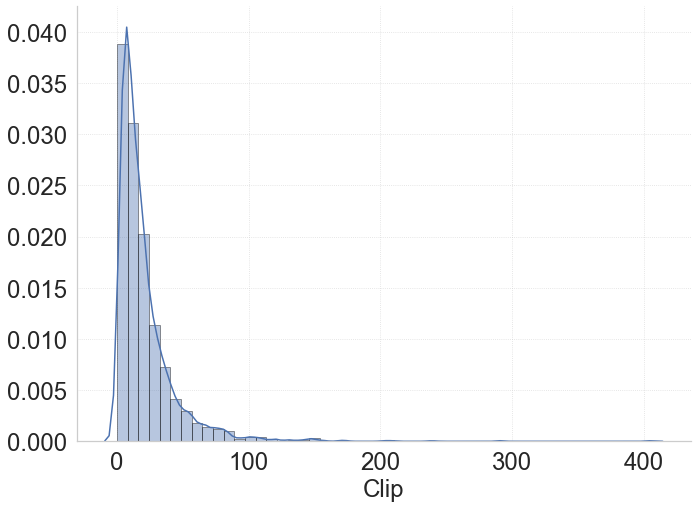

In [111]:
sns.distplot(clip_pivot2.Clip)

In [30]:
# if a kid ever watches clip > median (median of all kids) > 10 --> assign high clip watching
# if a kid ever watches clip < median  --> assign low clip watching
clip_pivot2["clip_or_no"] = np.where(clip_pivot2.Clip <= 10 , "Low Clip Watching", "High Clip Watching")
# merge this df with median.accuracy on installation
# compare

In [31]:
clip_pivot2

,Activity,Assessment,Clip,Game,accuracy,clip_or_no
installation_id,,,,,,
0006a69f,10.0,4.0,25.0,13.0,0.500000,High Clip Watching
0006c192,8.0,2.0,26.0,6.0,0.000000,High Clip Watching
001d0ed0,1.0,4.0,18.0,3.0,0.500000,High Clip Watching
00225f67,3.0,0.0,9.0,3.0,NaN,Low Clip Watching
00279ac5,10.0,0.0,17.0,11.0,NaN,High Clip Watching
...,...,...,...,...,...,...
ff9305d7,7.0,3.0,11.0,5.0,0.076923,High Clip Watching
ff9715db,11.0,8.0,16.0,6.0,1.000000,High Clip Watching
ffc90c32,7.0,5.0,25.0,11.0,1.000000,High Clip Watching


## swarm plot

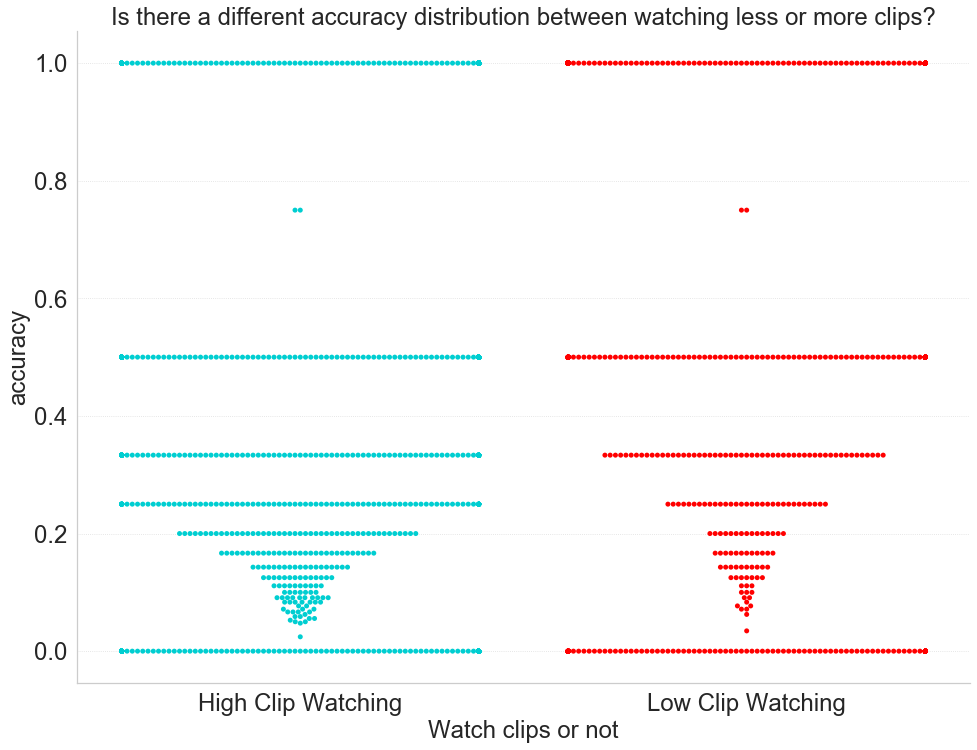

In [32]:
plt.figure(figsize=(16,12))
sns.swarmplot(x="clip_or_no", y="accuracy", data=clip_pivot2, palette = my_pal[2:4])

plt.xlabel('Watch clips or not')
#plt.xticks((''))
plt.title("Is there a different accuracy distribution between watching less or more clips?")
plt.savefig("clip_accuracy.pdf")

## scatter plot

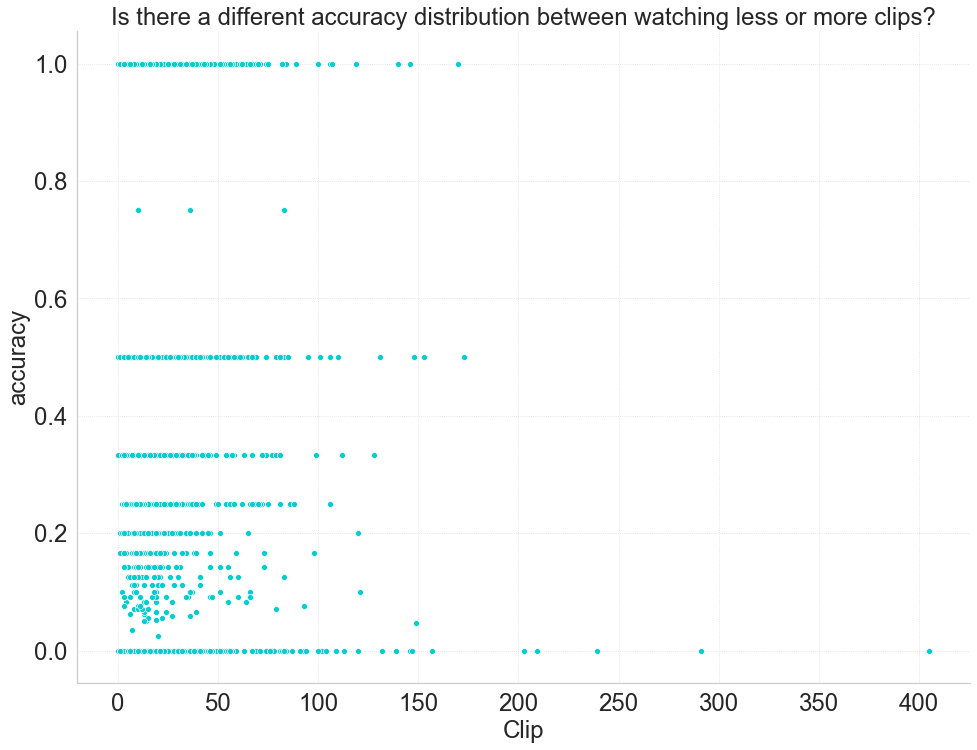

In [33]:
plt.figure(figsize=(16,12))
sns.scatterplot(x = 'Clip', y = 'accuracy', data =clip_pivot2, color = my_pal[2])
plt.title("Is there a different accuracy distribution between watching less or more clips?")
plt.savefig("clip_accuracy_scatter.pdf")

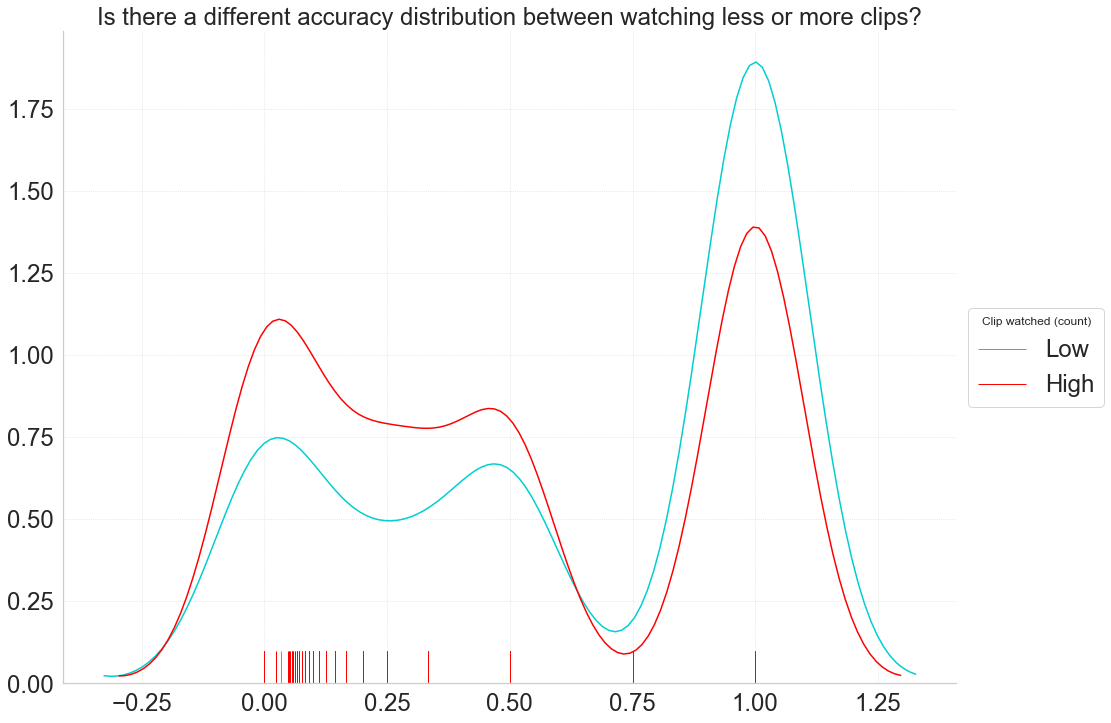

In [34]:
plt.figure(figsize=(16,12))

# Sort the dataframe by target
target_0 = clip_pivot2.loc[clip_pivot2['clip_or_no'] == 'Low Clip Watching']
target_1 = clip_pivot2.loc[clip_pivot2['clip_or_no'] == 'High Clip Watching']

sns.distplot(target_0[['accuracy']], hist=False, rug=True, color = my_pal[2])
sns.distplot(target_1[['accuracy']], hist=False, rug=True, color = my_pal[3])

plt.legend(title='Clip watched (count)', labels = ["Low", "High"],loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("What're the score distributions for different kid learning bahavior: linear versus non-linear?")

#plt.show()

plt.title("Is there a different accuracy distribution between watching less or more clips?")
plt.savefig("clip_accuracy_distplot.pdf")

## Mann-Whitney u & correlation test
- need to resample to make sure sample size same
- mann-whitney u > because the distribution isn't gaussian/ normal

In [35]:
from scipy import stats as stats
from scipy.stats import mannwhitneyu

In [36]:
clip_pivot2["clip_or_no_num"] = np.where(clip_pivot2.Clip <= 10 , 0, 1)

In [37]:
clip_pivot2 = clip_pivot2.dropna()

In [38]:
r, p = stats.pearsonr(clip_pivot2.clip_or_no_num, clip_pivot2.accuracy)

In [39]:
r

-0.16782822504973074

In [40]:
p

3.1618020796123506e-17

In [41]:
clip_pivot2.clip_or_no.value_counts()

High Clip Watching    1519
Low Clip Watching      977
Name: clip_or_no, dtype: int64

In [42]:
high = clip_pivot2[clip_pivot2.clip_or_no == "High Clip Watching"].accuracy

In [43]:
low = clip_pivot2[clip_pivot2.clip_or_no == "Low Clip Watching"].accuracy

In [44]:
random_seed = 1

## Hypothesis - Clip watching versus accuracy
$H0:$ There is no difference in assessment performance between kids who watch more clips versus those who watch less clips.

$Ha: $ There is difference in assessment performance between kids who watch more clips versus those who watch less clips.

In [45]:
# compare samples
stat, p = mannwhitneyu(high, low)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=605688.000, p=0.000
Different distribution (reject H0)


# Learning behavior: Linear versus Random

In [54]:
syllabus = pd.read_csv("media_sequence.csv")

In [55]:
syllabus["order"] = range(1, 45)

In [56]:
syllabus.head()

,title,type,duration (same as df),duration (s),order
0,Welcome to Lost Lagoon!,Clip,19000,19.0,1
1,Tree Top City - Level 1,Clip,17000,17.0,2
2,Ordering Spheres,Clip,61000,61.0,3
3,All Star Sorting,Game,0,NaN,4
4,Costume Box,Clip,61000,61.0,5


In [58]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [50]:
# merge main dataframe with "syllabus"
exp_eepd2 =  (df
              .merge(syllabus, how = 'left', left_on = "title", right_on = "title")
              .set_index(["installation_id", "timestamp"]))

In [51]:
exp_eepd2.head()

event_id      game_session  \
installation_id timestamp                                                      
0006a69f        2019-08-06 04:57:45.301000+00:00  27253bdc  4b57c9a59474a1b9   
                2019-08-06 04:58:14.538000+00:00  77261ab5  2b9d5af79bcdb79f   
                2019-08-06 04:58:14.615000+00:00  b2dba42b  2b9d5af79bcdb79f   
                2019-08-06 04:58:16.680000+00:00  1325467d  2b9d5af79bcdb79f   
                2019-08-06 04:58:18.474000+00:00  1325467d  2b9d5af79bcdb79f   

                                                                                                                                 event_data  \
installation_id timestamp                                                                                                                     
0006a69f        2019-08-06 04:57:45.301000+00:00                                                     {"event_code": 2000, "event_count": 1}   
                2019-08-06 04:58:14.538000+00:00                          {"version":"1.0","event_count":1,"game_time":0,"event_code":2000}   
                2019-08-06 04:58:14.615000+00:00  {"description":"Let's build a sandcastle! First, fill up your mold with sand! You can ...   
                2019-08-06 04:58:16.680000+00:00  {"coordinates":{"x":273,"y":650,"stage_width":1015,"stage_height":762},"event_count":3...   
                2019-08-06 04:58:18.474000+00:00  {"coordinates":{"x":863,"y":237,"stage_width":1015,"stage_height":762},"event_count":4...   

                                                  event_count  event_code  \
installation_id timestamp                                                   
0006a69f        2019-08-06 04:57:45.301000+00:00            1        2000   
                2019-08-06 04:58:14.538000+00:00            1        2000   
                2019-08-06 04:58:14.615000+00:00            2        3010   
                2019-08-06 04:58:16.680000+00:00            3        4070   
                2019-08-06 04:58:18.474000+00:00            4        4070   

                                                  game_time  \
installation_id timestamp                                     
0006a69f        2019-08-06 04:57:45.301000+00:00          0   
                2019-08-06 04:58:14.538000+00:00          0   
                2019-08-06 04:58:14.615000+00:00         29   
                2019-08-06 04:58:16.680000+00:00       2137   
                2019-08-06 04:58:18.474000+00:00       3937   

                                                                          title  \
installation_id timestamp                                                         
0006a69f        2019-08-06 04:57:45.301000+00:00           Magma Peak - Level 1   
                2019-08-06 04:58:14.538000+00:00  Sandcastle Builder (Activity)   
                2019-08-06 04:58:14.615000+00:00  Sandcastle Builder (Activity)   
                2019-08-06 04:58:16.680000+00:00  Sandcastle Builder (Activity)   
                2019-08-06 04:58:18.474000+00:00  Sandcastle Builder (Activity)   

                                                    type_x      world  \
installation_id timestamp                                               
0006a69f        2019-08-06 04:57:45.301000+00:00      Clip  MAGMAPEAK   
                2019-08-06 04:58:14.538000+00:00  Activity  MAGMAPEAK   
                2019-08-06 04:58:14.615000+00:00  Activity  MAGMAPEAK   
                2019-08-06 04:58:16.680000+00:00  Activity  MAGMAPEAK   
                2019-08-06 04:58:18.474000+00:00  Activity  MAGMAPEAK   

                                                  num_correct  num_incorrect  \
installation_id timestamp                                                      
0006a69f        2019-08-06 04:57:45.301000+00:00          NaN            NaN   
                2019-08-06 04:58:14.538000+00:00          NaN            NaN   
                2019-08-06 04:58:14.615000+00:00          NaN            NaN   
           

In [52]:
exp_eepd2.world.unique()

array(['MAGMAPEAK', 'TREETOPCITY', 'CRYSTALCAVES'], dtype=object)

In [ ]:
#median = exp_eepd2.groupby(["installation_id"]).accuracy.median().reset_index()

In [ ]:
#median

## Chi-square test for accessment perfomance (max accuracy_group) associated with kids who follow PBS Measure Up! curriculum or not

In [59]:
chi = df.groupby(["installation_id"]).median()["accuracy_group"].to_frame().reset_index()

In [60]:
chi.accuracy_gourp = chi.accuracy_group.astype('object')

In [61]:
chi.accuracy_group.value_counts()

3.0    1035
1.0     526
0.0     508
2.0     420
2.5       4
1.5       3
Name: accuracy_group, dtype: int64

In [62]:
chi

,installation_id,accuracy_group
0,0006a69f,2.0
1,0006c192,0.0
2,001d0ed0,2.0
3,00225f67,NaN
4,00279ac5,NaN
...,...,...
3480,ff9305d7,1.0
3481,ff9715db,3.0
3482,ffc90c32,3.0
3483,ffd2871d,NaN


In [63]:
chi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 2 columns):
installation_id    3485 non-null object
accuracy_group     2496 non-null float64
dtypes: float64(1), object(1)
memory usage: 54.6+ KB


In [64]:
chi_part = exp_eepd2.groupby('installation_id').order.apply(linear_random.is_list_sorted).reset_index()

In [65]:
chi_part

,installation_id,order
0,0006a69f,False
1,0006c192,False
2,001d0ed0,True
3,00225f67,True
4,00279ac5,False
...,...,...
3480,ff9305d7,False
3481,ff9715db,False
3482,ffc90c32,True
3483,ffd2871d,True


In [66]:
chi_part = chi_part.merge(chi, how = "left", left_on = "installation_id", right_on = "installation_id")

In [67]:
chi_part

,installation_id,order,accuracy_group
0,0006a69f,False,2.0
1,0006c192,False,0.0
2,001d0ed0,True,2.0
3,00225f67,True,NaN
4,00279ac5,False,NaN
...,...,...,...
3480,ff9305d7,False,1.0
3481,ff9715db,False,3.0
3482,ffc90c32,True,3.0
3483,ffd2871d,True,NaN


In [68]:
chi_part.order.value_counts()

False    2532
True      953
Name: order, dtype: int64

In [69]:
NL = chi_part[chi_part.order == False].sample(n=953)
L = chi_part[chi_part.order == True]

In [73]:
subset_chi_part = pd.concat([NL, L])

In [74]:
subset_chi_part.order.value_counts()

True     953
False    953
Name: order, dtype: int64

In [130]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [217]:
# check out the frequency(%) of each path (follow curriculum or not) - accuracy group combinations
# compare within path
compare_within_paths = pd.crosstab(subset_chi_part.order, subset_chi_part.accuracy_group).apply(lambda r: r/r.sum(), axis = 1).reset_index()

In [218]:
compare_within_paths.reset_index().drop(columns = 'index', inplace = True)

In [219]:
compare_within_paths.drop(columns = [1.5,2.5], inplace = True)

In [220]:
compare_within_paths.columns = ['Linear or Non-Linear', 'Never succeeded', 'Passed after multiple attempts', 'passed after the second attemp', 'Nailed it the first attempt']

In [221]:
compare_within_paths

,Linear or Non-Linear,Never succeeded,Passed after multiple attempts,passed after the second attemp,Nailed it the first attempt
0,False,0.196989,0.228356,0.171895,0.396487
1,True,0.147583,0.119593,0.122137,0.610687


In [222]:
compare_within_paths = compare_within_paths.reset_index()

In [233]:
compare_within_paths = pd.melt(compare_within_paths, id_vars = "Linear or Non-Linear")

In [ ]:
compare_within_paths.drop([0, 1], inplace = True)

In [251]:
compare_within_paths

,Linear or Non-Linear,variable,value
2,False,Never succeeded,0.196989
3,True,Never succeeded,0.147583
4,False,Passed after multiple attempts,0.228356
5,True,Passed after multiple attempts,0.119593
6,False,passed after the second attemp,0.171895
7,True,passed after the second attemp,0.122137
8,False,Nailed it the first attempt,0.396487
9,True,Nailed it the first attempt,0.610687


In [252]:
compare_within_paths_L = compare_within_paths[compare_within_paths['Linear or Non-Linear'] == True]
compare_within_paths_NL = compare_within_paths[compare_within_paths['Linear or Non-Linear'] == False]

In [309]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)

fig.add_trace(go.Bar(
    y=compare_within_paths_L.variable,
    x=compare_within_paths_L.value,
    name='Follow designed path',
    marker_color='deepskyblue',
    orientation = 'h'),
    row=1, col=1
)

fig.add_trace(go.Bar(
    y=compare_within_paths_NL.variable,
    x=compare_within_paths_NL.value,
    name='Not follow designed path',
    marker_color='khaki',
    orientation = 'h'),
    row=2, col=1
)

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.update_yaxes(tickfont=dict(size=16))
fig.update_xaxes(tickfont=dict(size=16))
fig.update_layout(dict(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)'))
fig.update_layout(legend=dict(font=dict(size=18), x=1, y=0.5))

#fig.update_layout(yaxis2=dict(showticklabels=False))
fig.update_traces(marker=dict(size=16,line=dict(width=2,color='black')),selector=dict(mode='markers'))
fig.show()

In [247]:
traces=[]
#colors = ['darkturquoise', 'darkturquoise','darkturquoise', 'darkturquoise' ]
for x, g in compare_within_paths.groupby('Linear or Non-Linear'):
    traces.append(go.Bar(x=g.variable, y=g.value, name=x))

fig = go.Figure(data=traces)
fig.update_layout(dict(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)'))
fig.update_traces(marker=dict(size=16,line=dict(width=2,color='black')),selector=dict(mode='markers'))
#fig.update_traces(marker_color=colors)

In [ ]:
#observed.columns = ['Learning Path', 'Never success', 'Got it after multiple attempts','Nailed it at 2nd attempt','Nailed it first time']

In [314]:
# check out the frequency(%) of each path (follow curriculum or not) - assessment score group combinations
# compare withing each assessment score group
chi_path_exp = pd.crosstab(subset_chi_part.order, subset_chi_part.accuracy_group).apply(lambda r: r/r.sum()).reset_index()

In [229]:
chi_path_exp.reset_index().drop(columns = 'index', inplace = True)

In [230]:
chi_path_exp.drop(columns = [1.5, 2.5], inplace = True)

In [231]:
chi_path_exp.columns = (
    ['Linear or Non-Linear', 
     'Never succeeded', 
     'Passed after multiple attempts', 
     'passed after the second attemp', 
     'Nailed it the first attempt'])

In [232]:
chi_path_exp.columns

Index(['Linear or Non-Linear', 'Never succeeded',
       'Passed after multiple attempts', 'passed after the second attemp',
       'Nailed it the first attempt'],
      dtype='object')

In [238]:
chi_path_exp = chi_path_exp.reset_index()

In [316]:
chi_path_exp

accuracy_group,order,0.0,1.0,1.5,2.0,2.5,3.0
0,False,0.730233,0.79476,1.0,0.740541,1.0,0.568345
1,True,0.269767,0.20524,0.0,0.259459,0.0,0.431655


In [240]:
observed_new = pd.melt(chi_path_exp, id_vars = "Linear or Non-Linear")

In [242]:
observed_new  = observed_new.drop([0, 1])

In [250]:
traces=[]
#colors = ['darkturquoise', 'darkturquoise','darkturquoise', 'darkturquoise' ]
for x, geo_region in observed_new.groupby('Linear or Non-Linear'):
    traces.append(go.Bar(x=geo_region.variable, y=geo_region.value, name=x))
    #print(geo_region)
    print(x)

fig = go.Figure(data=traces)
fig.update_layout(dict(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)'))
fig.update_traces(marker=dict(size=16,line=dict(width=2,color='black')),selector=dict(mode='markers'))
fig.show()

False
True


In [320]:
observed = pd.crosstab(subset_chi_part.order, subset_chi_part.accuracy_group).reset_index()

In [322]:
observed.reset_index().drop(columns = 'index', inplace = True)

In [325]:
observed.drop(columns = [1.5, 2.5], inplace = True)

In [326]:
observed

accuracy_group,order,0.0,1.0,2.0,3.0
0,False,157,182,137,316
1,True,58,47,48,240


In [327]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [330]:
print(f"""
chi-square: {chi2},
p-value: {p},
degf: {degf}
------------------
expected: {expected }
""")


chi-square: 51.628504390961076,
p-value: 1.649599083944997e-10,
degf: 4
------------------
expected: [[6.67790894e-01 1.43575042e+02 1.52924115e+02 1.23541315e+02
  3.71291737e+02]
 [3.32209106e-01 7.14249578e+01 7.60758853e+01 6.14586847e+01
  1.84708263e+02]]



In [ ]:
sns.swarmplot(x="order", y="accuracy", data=observed)

In [ ]:
chi2

In [ ]:
p # fail to reject, is difference

In [ ]:
subset_chi_part.accuracy_group.value_counts()

In [ ]:
subset_chi_part.order.value_counts()

In [ ]:
sns.catplot(x="order", hue="accuracy_group", kind="count",
            palette=my_pal, edgecolor=".6",
            data=subset_chi_part)

In [ ]:
plt.figure(figsize=(16,12))
sns.catplot(x="accuracy_group", hue="order", kind="count",
            palette=my_pal, edgecolor=".6",
            data=subset_chi_part)

plt.legend(title='Learning Behavior', labels = ["Non-Linear","Linear"],loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("Accuracy Group")
plt.title("Is there a difference in best assessment score between students using different learning path?")

In [ ]:
subset_chi_part.order.value_counts()

In [ ]:
pcts

In [ ]:
#plt.figure(figsize=(16,12))

c = (subset_chi_part.groupby("accuracy_group")["order"].count())
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x = "accuracy_group" , y="order",data=pcts, palette=my_pal))


#plt.title("What are the usage distributions (ratio) for each item in the game?")
#plt.savefig('engagement_type_freq.pdf')

# overall, games and activities are much more used than assessments

In [ ]:
(subset_chi_part[subset_chi_part.accuracy_group == 3.0].groupby("order").order.count()).to_frame()

In [ ]:
c = (subset_chi_part[subset_chi_part.accuracy_group == 3.0].groupby("order").order.count())
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x = "accuracy_group" , y="order",data=pcts, palette=my_pal))

In [ ]:
plt.figure(figsize=(16,12))
sns.catplot(x="accuracy_group", hue="order", kind="count",
            palette=my_pal, edgecolor=".6",
            data=subset_chi_part)

In [ ]:
from  matplotlib.ticker import PercentFormatter

In [ ]:
subset_chi_part

In [ ]:
sub = subset_chi_part.dropna()

In [ ]:
sub.head()

In [ ]:
sub_chi_part = chi_part.dropna()

In [ ]:
plt.figure(figsize=(16,12))

# Sort the dataframe by target
target_0 = sub_chi_part.loc[sub_chi_part['order'] == False]
target_1 = sub_chi_part.loc[sub_chi_part['order'] == True]

sns.distplot(target_0[['accuracy_group']], hist=False, rug=True, color = my_pal[2])
sns.distplot(target_1[['accuracy_group']], hist=False, rug=True, color = my_pal[3])

#plt.legend(title='Clip watched (count)', labels = ["Low", "High"],loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("What're the score distributions for different kid learning bahavior: linear versus non-linear?")

#plt.show()

#plt.title("Is there a different accuracy distribution between watching less or more clips?")
#plt.savefig("clip_accuracy_distplot.pdf")

In [ ]:
plt.figure(figsize=(16,12))

# Sort the dataframe by target
target_0 = sub.loc[sub['order'] == False]
target_1 = sub.loc[sub['order'] == True]

sns.distplot(target_0[['accuracy_group']], hist=False, rug=True, color = my_pal[2])
sns.distplot(target_1[['accuracy_group']], hist=False, rug=True, color = my_pal[3])

#plt.legend(title='Clip watched (count)', labels = ["Low", "High"],loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("What're the score distributions for different kid learning bahavior: linear versus non-linear?")

#plt.show()

#plt.title("Is there a different accuracy distribution between watching less or more clips?")
#plt.savefig("clip_accuracy_distplot.pdf")

# mann-whitnney u test relationship between accuracy & learning path

In [ ]:
# exp_eepd2 = df + syllabus, now join w/ median 

In [ ]:
exp_eepd2 = (exp_eepd2
             .reset_index()
             .merge(median, how = "left", left_on = "installation_id", right_on = "installation_id")
             .set_index(["installation_id", "timestamp"]))

In [ ]:
exp_eepd2

In [ ]:
exp_eepd2["accuracy"] = np.where(exp_eepd2.accuracy_x.isna(), exp_eepd2.accuracy_y, exp_eepd2.accuracy_x)
#df['c2'] = np.where(df.c1 == 8,'X',df.c3)

In [ ]:
exp_eepd2

In [ ]:
path = exp_eepd2.groupby('installation_id').order.apply(linear_random.is_list_sorted).reset_index()

In [ ]:
path

In [ ]:
print(f"The percentage of kids who follow linear learning path: {round(path.mean(),2)*100}%")

In [ ]:
path.columns

In [ ]:
path = path.merge(median, how = "left", left_on = "installation_id", right_on = "installation_id")

In [ ]:
path

In [ ]:
path["order_"] = np.where(path.order == True, "Linear", "Non-linear")

In [ ]:
sns.swarmplot(x="order_", y="accuracy", data=path)

In [ ]:
path.order_.value_counts()

In [ ]:
path[path.order_ == "Non-linear"].accuracy.mean()

In [ ]:
path[path.order_ == "Non-linear"].accuracy.median()

In [ ]:
path[path.order_ == "Linear"].accuracy.mean()

In [ ]:
path[path.order_ == "Linear"].accuracy.median()

In [ ]:
NL = path[path.order_ == "Non-linear"].sample(n=953)
L = path[path.order_ == "Linear"]

In [ ]:
import statistics

In [ ]:
NL = NL.dropna()

In [ ]:
L = L.dropna()

In [ ]:
statistics.stdev(NL.accuracy)

In [ ]:
statistics.stdev(L.accuracy)

In [ ]:
NL = NL.dropna()

In [ ]:
L = L.dropna()

In [ ]:
NL.accuracy.mean()

In [ ]:
NL.accuracy.median()

In [ ]:
sns.boxplot(x = 'accuracy', data = NL)

In [ ]:
sns.boxplot(x = 'accuracy', data = L)

In [ ]:
from scipy.stats import iqr

In [ ]:
iqr(NL.accuracy)

In [ ]:
iqr(L.accuracy)

In [ ]:
NL.accuracy.describe()

In [ ]:
NL.accuracy.describe()

In [ ]:
L.accuracy.describe()

In [ ]:
L.accuracy.describe()

In [ ]:
L['process_outliers'] = np.where(L.accuracy < 0.33, 0.33, L.accuracy)

In [ ]:
L[L.accuracy < 0.33]

In [ ]:
L.process_outliers.describe()

In [ ]:
iqr(L.accuracy)

In [ ]:
L.accuracy.mean()

In [ ]:
L.accuracy.median()

In [ ]:
join_N_NL = pd.concat([L,NL]) 

In [ ]:
join_N_NL[join_N_NL.accuracy <= 0.5].order_.value_counts()

In [ ]:
fig = px.violin(join_N_NL, y="accuracy", x = 'order_', box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(x = L.accuracy, y = NL.accuracy
                 #title="Gender Earnings Disparity",
                 ,labels={"salary":"Annual Salary (in thousands)"} # customize axis label
                )

fig.show()

fig = go.Figure(data=go.Scatter(x=L.accuracy,
                                y=NL.accuracy,
                                mode='markers',
                                marker_color=data['Population'],
                                text=data['State'])) # hover text goes here

#fig.update_layout(title='Population of USA States')
fig.show()

In [ ]:
sns.swarmplot(x="order_", y="accuracy", data=join_N_NL)

In [ ]:
NL.info()

In [ ]:
# compare samples
stat, p = mannwhitneyu(NL.accuracy, L.accuracy)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
# alpha = 0.05
# if p > alpha:
#     print('Same distribution (fail to reject H0)')
# else:
#     print('Different distribution (reject H0)')
# # the two groups are largely overlapped and backed by p <0.05 
# # so we conclude two groups are similar

In [ ]:
plt.figure(figsize=(16,12))

NL = path[path.order_ == "Non-linear"].accuracy
L = path[path.order_ == "Linear"].accuracy

sns.distplot(NL, hist=False, rug=True, color = my_pal[2])
sns.distplot(L, hist=False, rug=True, color = my_pal[3])

plt.legend(title='Learning Patter', labels = ["Non-linear", "Linear"],loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("What're the score distributions for different kid learning bahavior: linear versus non-linear?")

#plt.show()

#plt.title("Is there a different accuracy distribution between watching less or more clips?")
#plt.savefig("clip_accuracy_distplot.pdf")

In [ ]:
path.order.value_counts()

In [ ]:
NL = path[path.order == False].sample(n=325425)
L = path[path.order == True].accuracy

In [ ]:
contingency_table = pd.crosstab(NL, L)
contingency_table


In [ ]:
clip = df.groupby(['installation_id','world','type','title'])[['game_session']].count().reset_index()

In [ ]:
clip_pivot = (clip
       .pivot_table(
           #values = 'title', 
           index = ['installation_id'], 
           columns = ['type'], 
           #aggfunc=np.sum
       ).fillna(0).reset_index())


In [ ]:
clip_pivot

In [ ]:
df.groupby(['installation_id','game_session','world','type','title']).event_id.count()

In [ ]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
df = df[df.world != "NONE"]

In [ ]:
df.shape

In [ ]:
agg = df.groupby(['installation_id','world'])[['game_session']].count()

In [ ]:
agg

In [ ]:
agg = agg.reset_index()

In [ ]:
agg

In [ ]:
agg = agg.pivot(index = 'installation_id', columns = 'world').fillna(0).reset_index()

In [ ]:
agg

In [ ]:
agg.columns = ['installation_id', 'Crystalcaves', 'Magamapeak', 'Treetopcity']

In [ ]:
agg.set_index('installation_id', inplace = True)

In [ ]:
agg.to_csv('practice_counts.csv')

In [ ]:
plt.figure(figsize=(8,6))

c = agg.sum(axis = 0)
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
pcts.columns = ['world', 'percentage']
(sns.barplot(x = "world" , y="percentage", data=pcts, palette=my_pal))
#plt.legend(title='World', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("What are the usage distributions (ratio) for each world?")

# Magamapeak > most frequently visited world 

In [ ]:
agg.sort_values(by = ['Magamapeak','Treetopcity','Crystalcaves'], ascending = False, inplace = True)

In [ ]:
agg = agg.reset_index()

In [ ]:
sns.boxplot(agg.Magamapeak)

In [ ]:
sns.boxplot(agg.Crystalcaves)

In [ ]:
sns.boxplot(agg.Treetopcity)

In [ ]:
agg.Crystalcaves.median()

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(agg.Magamapeak)

In [ ]:
sns.distplot(agg.Crystalcaves)

In [ ]:
sns.distplot(agg.Treetopcity)

In [ ]:
(df.groupby(["world","type"])["game_session"].count())

In [ ]:
plt.figure(figsize=(8,6))

c = (df.groupby(["world","type"])["game_session"].count())
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x = "type" , y="game_session", data=pcts, palette=my_pal))

plt.title("What are the most visited engagement types in the game?")

# overall, games and activities are much more used than assessments

In [ ]:
# top 5 most played missions
pcts[pcts.game_session >= 4.5].sort_values('game_session', ascending = False)

In [ ]:
plt.figure(figsize=(15,8))

c = (df.groupby(["world", "type", "title"])["game_session"].count())
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
pcts = pcts[pcts.game_session >= 3.5]
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x = "world" , y="game_session", data=pcts,  hue = "title",palette=my_pal))
plt.legend(title='Mission types within engagement types', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title("The most used missions in each world & engagement type (only showing record of >3.5% usage)?")


In [ ]:
# look at a ratio of total game time:total clicks

In [ ]:
# import Faith's game time dadaset, note that game_time does not include time for clips
game_time = pd.read_csv('game_mins.csv')

In [ ]:
game_time.drop(columns = 'Unnamed: 0', inplace = True)

In [ ]:
game_time.head()

In [ ]:
df.head()

In [ ]:
# in each user account, how many games did they play, and how many actions did they actually do?
action = df.groupby(['installation_id','game_session', 'type']).event_id.count().reset_index()

In [ ]:
act = action.drop(columns = 'game_session')

In [ ]:
act

In [ ]:
agg = agg.pivot(index = 'installation_id', columns = 'world').fillna(0).reset_index()
act.pivot(index = 'installation_id', columns = '')

In [ ]:
med = act.event_id.median()

In [ ]:
Q1 = 

In [ ]:
action = action.pivot(index = 'installation_id', columns = 'type').fillna(0).reset_index()

In [ ]:
action = agg.reset_index()
agg = agg.pivot(index = 'installation_id', columns = 'world').fillna(0).reset_index()
agg.columns = ['installation_id', 'Crystalcaves', 'Magamapeak', 'Treetopcity']
agg.set_index('installation_id', inplace = True)

In [ ]:
df.groupby(['installation_id','world']).game_session.count()

In [ ]:
df.groupby(['installation_id','world','type']).game_session.count()

In [ ]:
df.groupby(['installation_id','world','type','game_session']).event_id.count()

In [ ]:
df.groupby(['installation_id','world','type','game_session']).event_count.value_counts()

In [ ]:
df.groupby(['installation_id','world','type','game_session']).event_id.value_counts()

In [ ]:
df['game_time_min'] = (df.game_time/60000)

In [ ]:
df_no_clip = df[df.type!= 'Clip']

In [ ]:
df.groupby(['world','type']).title.count().to_frame()

In [ ]:
pd.pivot_table(df_no_clip, values = ["game_time_min"], index=["world", "type", "title"], aggfunc=[np.sum, np.mean, np.median])

In [ ]:
# if game_time << game_time median for particular mission, do something so we don't include click arounds

In [ ]:
user_result = pd.crosstab(df.installation_id, df.accuracy_group)

In [ ]:
user_nail_rate = pd.DataFrame(df.groupby("installation_id")["accuracy"].median())

In [ ]:
user_type = pd.crosstab(df.installation_id, df.type)

In [ ]:
exp_eepd = pd.concat([user_type, user_result, user_nail_rate], axis = 1)

In [ ]:
# filter random:
# among all data and the various "learning" items of
# "Activity", "Clip", "Game"
# if  participate in none > 
# if participate in at least 1/ 2 > then?
# how does that compare to participate all three?

# next need to consider time component,
# finding the order of EEPD
exp_eepd

In [ ]:
exp_eepd["nActivity"] = exp_eepd.Activity.apply(lambda x: 1 if x > 0 else 0)
exp_eepd["nClip"] = exp_eepd.Clip.apply(lambda x: 1 if x > 0 else 0)
exp_eepd["nGame"] = exp_eepd.Game.apply(lambda x: 1 if x > 0 else 0)

In [ ]:
exp_eepd["sum_engage"] = exp_eepd.nActivity + exp_eepd.nClip + exp_eepd.nGame

In [ ]:
plot = exp_eepd.sum_engage.value_counts(normalize = True).to_frame().reset_index()
(sns.barplot(x = "index" , y="sum_engage", data=plot, palette=my_pal))
plt.title("Throughout the play-time, how many engagement types did each kid use?")
plt.xlabel("Number of engagement types")

In [ ]:
syllabus = pd.read_csv("media_sequence.csv")

In [ ]:
syllabus.shape

In [ ]:
syllabus["order"] = range(1, 45)

In [ ]:
syllabus.head()

In [ ]:
# merge main dataframe with "syllabus"
exp_eepd2 =  (df
              .merge(syllabus, how = 'left', left_on = "title", right_on = "title")
              .set_index(["installation_id", "timestamp"]))

In [ ]:
median = exp_eepd2.groupby(["installation_id"]).accuracy.median().reset_index()

In [ ]:
exp_eepd2 = (exp_eepd2
             .reset_index()
             .merge(median, how = "left", left_on = "installation_id", right_on = "installation_id")
             .set_index(["installation_id", "timestamp"]))

In [ ]:
exp_eepd2.head()

In [ ]:
exp_eepd2["accuracy"] = np.where(exp_eepd2.accuracy_x.isna(), exp_eepd2.accuracy_y, exp_eepd2.accuracy_x)
#df['c2'] = np.where(df.c1 == 8,'X',df.c3)

In [ ]:
from linear_random import *

In [ ]:
path = exp_eepd2.groupby('installation_id').order.apply(is_list_sorted).reset_index()

In [ ]:
path

In [ ]:
print(f"The percentage of kids who follow linear learning path: {round(path.mean(),2)*100}%")

In [ ]:
path = path.merge(exp_eepd2.accuracy, how = "left", left_on = "installation_id", right_on = "installation_id")

In [ ]:
path = path.groupby(["installation_id","order"]).median().reset_index()

In [ ]:
path.groupby("order").accuracy.median()

In [ ]:
path["order_"] = np.where(path.order == True, "Linear", "Non-linear")

In [ ]:
# Sort the dataframe by target
target_0 = path.loc[path['order_'] == "Linear"]
target_1 = path.loc[path['order_'] == "Non-linear"]

sns.distplot(target_0[['accuracy']], hist=False, rug=True, color = 'red')
sns.distplot(target_1[['accuracy']], hist=False, rug=True, color = 'darkturquoise')

plt.legend(title='Learning Paths', labels = ["Linear", "Non-linear"],loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("What're the score distributions for different kid learning bahavior: linear versus non-linear?")

plt.show()

In [ ]:
path.groupby("order").accuracy.value_counts()

In [ ]:
sns.swarmplot(x="order_", y="accuracy", data=path, palette = my_pal[2:4])
plt.xlabel('Learning behaviors')
plt.title("Is there a different accuracy distribution between kids that demonstrate different learning behavior?")

In [ ]:
df.type

In [ ]:
df[df.type == 'Assessment'].groupby(["world","title"]).accuracy.median()

In [ ]:
df[df.type == 'Assessment'].groupby(["world","title"]).accuracy.mean()

In [ ]:
df[df.type == 'Assessment'].groupby(["world","title"]).installation_id.count()

In [ ]:
# fill in the median
median = df.groupby(["installation_id"]).accuracy.median().reset_index()

In [ ]:
median

In [ ]:
test = (df
             .reset_index()
             .merge(median, how = "left", left_on = "installation_id", right_on = "installation_id")
             .set_index(["installation_id"]))

In [ ]:
test.accuracy_x.isna().mean()

In [ ]:
test.accuracy_y.isna().mean()

In [ ]:
# recreate accuracy by filling in median if there's no accuracy score, else keep original
test["accuracy_c"] = np.where(test.accuracy_x.isna(), test.accuracy_y, test.accuracy_x)

In [ ]:
test.accuracy_c.value_counts()

In [ ]:
# what's wrong with my join?
test.type.unique()

In [ ]:
# drop kids who never took assessments
#.dropna(inplace = True)

In [ ]:
#df.shape #(5305297, 18)

In [ ]:
test.drop(columns = ['accuracy_x', 'accuracy_group', 'date', 'hour', 'weekday', 'accuracy_y'], inplace = True)

In [ ]:
test.type.value_counts()

In [ ]:
test.groupby(['installation_id']).type.value_counts()

In [ ]:
agg = test.groupby(['installation_id','game_session','type'])[['title']].count()

In [ ]:
agg

In [ ]:
agg = agg.reset_index()

In [ ]:
agg

In [ ]:
agggg = (agg
       .pivot_table(
           values = 'title', 
           index = ['installation_id'], 
           columns = ['type'], 
           aggfunc=np.sum).fillna(0).reset_index())


In [ ]:
len(agggg[agggg.Clip == 0])

In [ ]:
agggg.Clip.mean()

In [ ]:
agggg.Clip.median()

In [ ]:
sns.distplot(agggg.Clip)

In [ ]:
#agg.columns = ['installation_id', 'Activity', 'Assessment', 'Clip','Game']

In [ ]:
#agg = agg.set_index('installation_id')

# tmp2

In [ ]:
median

In [ ]:
testttt = (agggg
             .merge(median, how = "left", left_on = "installation_id", right_on = "installation_id")
             .set_index(["installation_id"]))

In [ ]:
testttt.drop(columns = ['index', 'Unnamed: 0'], inplace = True)

In [ ]:
testttt.columns

In [ ]:
testttt.Clip.mean()

In [ ]:
testttt.Clip.median()

In [ ]:
testttt.Clip.min()

In [ ]:
testttt = testttt.dropna()

In [ ]:
# if a kid ever watches clip > 1
# if a kid never watches clip > 0
testttt["clip_or_no"] = np.where(testttt.Clip < 15.5, 'Low', 'High')
# merge this df with median.accuracy on installation
# compare

In [ ]:
# this is how 
testttt['clip_or_no'].value_counts()

In [ ]:
sns.boxplot(testttt.accuracy)

In [ ]:
x = testttt.accuracy
# set conditions
# strings contain week, month, year need conversion
# strings contain day remain the same
condlist = ([
    x <= .2,
    (x > .2) & (x <= .8),
    x > .8
            ])
# when meeting the quiteria, do these math
choicelist = ("low_score",
              "mid_score",
              "high_score")
# store info back into df after conversion
testttt['look_accuracy'] = np.select(condlist, choicelist)

In [ ]:
testttt.look_accuracy.value_counts()

In [ ]:
testttt.head()

In [ ]:
testttt[testttt.look_accuracy == "low_score"].Clip.mean()

In [ ]:
testttt[testttt.look_accuracy == "low_score"].Activity.mean()

In [ ]:
testttt[testttt.look_accuracy == "low_score"].Game.mean()

In [ ]:
testttt[testttt.look_accuracy == "high_score"].Clip.mean()

In [ ]:
testttt[testttt.look_accuracy == "high_score"].Activity.mean()

In [ ]:
testttt[testttt.look_accuracy == "high_score"].Game.mean()

In [ ]:
# look at lower accuracy versus high accuracy, what's the clip watching rate looking like
look_accuracy = np.where(testttt.accuracy <.2, "low_score")

In [ ]:
sns.swarmplot(x="clip_or_no", y="accuracy", data=testttt, palette = my_pal[2:4])

plt.xlabel('Watch clips or not')
#plt.xticks((''))
plt.title("Is there a different accuracy distribution between kids who watch clips or not watch clips?")

In [ ]:
# Sort the dataframe by target
target_0 = testttt.loc[testttt['clip_or_no'] == 'Low']
target_1 = testttt.loc[testttt['clip_or_no'] == 'High']

sns.distplot(target_0[['accuracy']], hist=False, rug=True)
sns.distplot(target_1[['accuracy']], hist=False, rug=True)

plt.legend(title='Clip watched (count)', labels = ["Low", "High"],loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("What're the score distributions for different kid learning bahavior: linear versus non-linear?")

#plt.show()

In [ ]:
testttt["cat_clip_or_no"] = np.where(testttt.clip_or_no == "Low", 0, 1)

In [ ]:
from scipy import stats as stats

In [ ]:
r, p = stats.pearsonr(testttt.cat_clip_or_no, testttt.accuracy)

In [ ]:
r

In [ ]:
p

$H0$: There is no difference in accuracy between the kids who watch small amount of clips versus large amount of clips.

$Ha$: There is a difference in accuracy between the kids who watch small amount of clips versus large amount of clips.

In [ ]:
low = testttt[testttt.clip_or_no == "Low"].accuracy
high = testttt[testttt.clip_or_no == "High"].accuracy

In [ ]:
tstat, p = stats.ttest_ind(low, high)

In [ ]:
tstat

In [ ]:
p

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
low_trans = testttt[testttt.clip_or_no == "Low"].reset_index()
high_trans = testttt[testttt.clip_or_no == "High"].reset_index()

In [ ]:
low_trans

In [ ]:
transformer = Normalizer()
l_transformed = pd.DataFrame(transformer.transform(low_trans[['accuracy']]).flatten())
l_transformed = pd.DataFrame(l_transformed)
l = pd.concat([l_transformed,low_trans], axis=1)

In [ ]:
l.columns = ['transformed_accuracy', 'installation_id', 'Activity','Assessment','Clip','Game','accuracy','clip_or_no','cat_clip_or_no']

In [ ]:
transformer = Normalizer()
h_transformed = pd.DataFrame(transformer.transform(high_trans[['accuracy']]).flatten())
h_transformed = pd.DataFrame(h_transformed)
h = pd.concat([h_transformed,high_trans], axis=1)

In [ ]:
h.columns = ['transformed_accuracy', 'installation_id', 'Activity','Assessment','Clip','Game','accuracy','clip_or_no','cat_clip_or_no']

In [ ]:
plt.figure(figsize=(10,8))
# Sort the dataframe by target
target_0 = l.loc[l['clip_or_no'] == 'Low']
target_1 = h.loc[h['clip_or_no'] == 'High']

sns.distplot(target_0[['transformed_accuracy']], hist=False, rug=True)
sns.distplot(target_1[['transformed_accuracy']], hist=False, rug=True)

plt.legend(title='Clip watched (count)', labels = ["Low", "High"],loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("What're the score distributions for different kid learning bahavior: linear versus non-linear?")

#plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer,StandardScaler

In [ ]:
low_trans = testttt[testttt.clip_or_no == "Low"].reset_index()
high_trans = testttt[testttt.clip_or_no == "High"].reset_index()

In [ ]:
# create scaler object using yeo-johnson method and fit to train
l_scaler = PowerTransformer(method='yeo-johnson', standardize=False, copy=True).fit(low_trans[['accuracy']])
# fit linear.accuracy
l_scaled = pd.DataFrame(l_scaler.transform(low_trans[['accuracy']]))

# apply to test
#test_scaled = pd.DataFrame(scaler.transform(test), columns=test.columns.values).set_index([test.index.values])

l_scaled.head()

In [ ]:
sns.distplot(l_scaled, hist=False, rug=True)

In [ ]:
target_0 = testttt.loc[testttt['clip_or_no'] == 'Low']

sns.distplot(target_0[['accuracy']], hist=False, rug=True)
sns.distplot(l_scaled, hist=False, rug=True)

In [ ]:
sns.boxplot(l_scaled)